# 제 3절. 신고이슈 분석

## 관련 라이브러리 import
- https://github.com/lovit/customized_konlpy
- pip install customized_konlpy
- pip install textrankr

# <font color='green'> 1. 데이터 불러오기
- soynlp 사용하여 인바운드콜의 text내용을 의미있는 단위인 token(단어, 형태소 등)을 정의, token은 corpus 리스트 형태로 정의

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dir_path = 'D:/2020기본과제/1399/1399_data/'

In [3]:
df = pd.read_pickle(dir_path + '1399_dataset.pkl')
df =  df[['신고일시', '신고내용(내용기재) 200자', '년도', '시도']]
df.columns = ['신고일시', '신고내용', '년도', '시도']
# 인바운드 콜 정보에 nan을 제거
df['신고내용'].fillna('조상', inplace=True)
df['신고내용'].isnull().sum()

0

In [4]:
df.isnull().sum()

신고일시     1401
신고내용        0
년도       1401
시도      19595
dtype: int64

# 실습용

In [5]:
df = df.sample(frac=0.05, random_state= 1234)

In [6]:
df.shape
df.head()
df.tail()

(2644, 4)

,신고일시,신고내용,년도,시도
36470,2018-07-26 09:23:00,<박현미대박김치에서 이물발견>\n민원인은 2018-07-16일경 서창식자재마트(인천...,2018.0,경기도
5343,2015-07-27 17:33:00,식객소불고기도시락(즉석섭취식품) 주의 사항 표시 관련 신고주심.\n\n제품 표시 사...,2015.0,NaN
16885,2016-09-07 14:03:00,<담터꿀유자차에서 이물발견>\n민원인이 2016-08월중순쯤 롯데마트 삼양점에서 담...,2016.0,전라남도
22654,2017-04-24 13:16:00,<빨간통닭 위생불량>\n민원인은 빨간통닭(일반음식점/대구광역시 서구 달서로12길 1...,2017.0,대구광역시
45870,2019-05-27 16:11:00,"<해룡각 짬뽕 플라스틱가닥 이물발견>\n\n민원인은 2019-05-26, 해룡각(부...",2019.0,NaN


,신고일시,신고내용,년도,시도
44129,2019-03-28 11:07:00,<발효현미 표시사항 관련>\n민원인은 당뇨를 앓고 있어 민원인의 자녀가 옥션을 통해...,2019.0,전라남도
51344,2019-11-06 09:26:00,<진한초코 은박지 이물 발견>\n민원인의 자녀는 학교 급식시 진한초코(유형: 혼합음...,2019.0,경상남도
20454,2017-01-16 11:15:00,<송담추어탕 충북청주점 추어탕에서 벌레발견>\n민원인이 2017-01-15 송담추어...,2017.0,충청북도
21441,2017-02-27 18:01:00,<스무디더오렌지 곰팡이이물발견>\n민원인은 17-02-14 GS샵(인터넷)에서 스무...,2017.0,서울특별시
37584,2018-08-28 17:40:00,<하림 닭근위소금구이 제품변질>\n민원인은 2018-08-22경 이마트 진접점(경기...,2018.0,전라북도


### 이미지파일(jpg, ping 등) 불러오기 
df.to_excel('../1399_working/orginnal.xlsx')

## A. 신고콜 건별 문장길이, 단어 및 고유단어 수

Text(0.5, 1.0, '신고건 별 문장길이 분포')

Text(0.5, 1.0, '신고건 별 단어 수 분포')

Text(0.5, 1.0, '신고건 별 고유한 단어 수 분포')

신고건 별 문장길이 평균값 : 284.3245083207262
신고건 별 문장길이 중간값 263.0
신고건 별 단어 평균값 : 54.91906202723147
신고건 별 단어 중간값 50.0
신고건 별 고유 단어 평균값 : 51.54046898638427
신고건 별 고유 단어 중간값 48.0


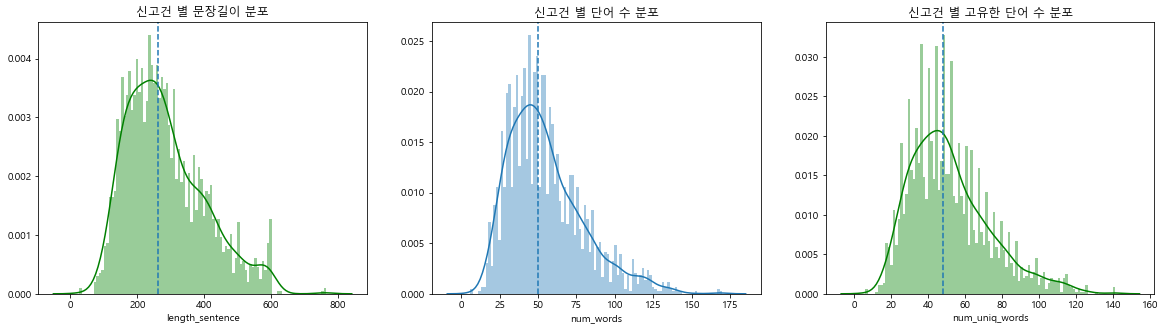

In [7]:
df['length_sentence'] = df['신고내용'].apply(lambda x: len(str(x))) # 문장길이
df['num_words'] = df['신고내용'].apply(lambda x: len(str(x).split())) # 단어 수
df['num_uniq_words'] = df['신고내용'].apply(lambda x: len(set(str(x).split()))) # 중복을 제거한 단어 수

fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

sns.distplot(df['length_sentence'], bins=100, color='g', ax=axes[0])
axes[0].axvline(df['length_sentence'].median(), linestyle='dashed')
axes[0].set_title('신고건 별 문장길이 분포')

sns.distplot(df['num_words'], bins=100, ax=axes[1])
axes[1].axvline(df['num_words'].median(), linestyle='dashed')
axes[1].set_title('신고건 별 단어 수 분포')

sns.distplot(df['num_uniq_words'], bins=100, color='g', ax=axes[2])
axes[2].axvline(df['num_uniq_words'].median(), linestyle='dashed')
axes[2].set_title('신고건 별 고유한 단어 수 분포')


print('신고건 별 문장길이 평균값 :', df['length_sentence'].mean()) ; print('신고건 별 문장길이 중간값', df['length_sentence'].median())
print('신고건 별 단어 평균값 :', df['num_words'].mean()); print('신고건 별 단어 중간값', df['num_words'].median())
print('신고건 별 고유 단어 평균값 :', df['num_uniq_words'].mean()) ; print('신고건 별 고유 단어 중간값', df['num_uniq_words'].median())

In [8]:
Image(filename='../images/img1.png', width=300, height=200)
Image(filename='../images/img5.png', width=1000, height=500)

NameError: name 'Image' is not defined

## B. Time

In [ ]:
df['년도']=df['신고일시'].apply(lambda x: x.year)
df['월']=df['신고일시'].apply(lambda x: x.month)
df['요일']=df['신고일시'].apply(lambda x: x.weekday())

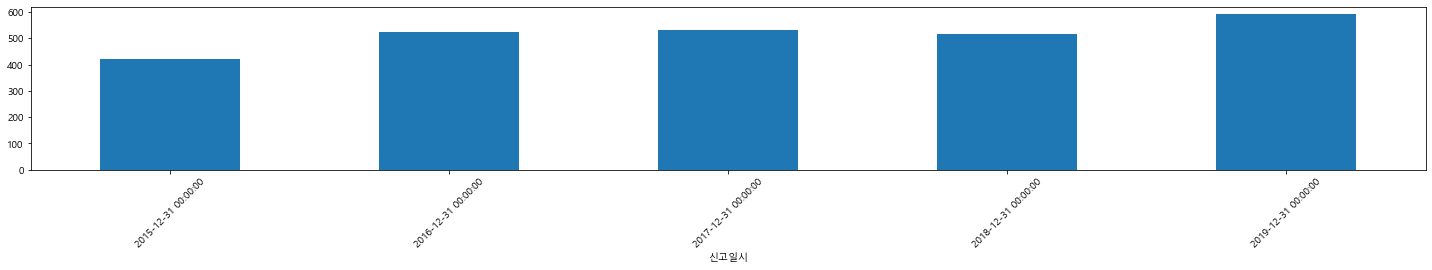

In [9]:
df.set_index('신고일시')['신고내용'].resample('Y').count().plot(kind='bar', rot='45', figsize =(25,3))

In [10]:
df.월.value_counts().plot(kind='bar', rot='45', figsize =(25,3))

AttributeError: 'DataFrame' object has no attribute '월'

In [11]:
df.요일.value_counts().plot(kind='bar', rot='45', figsize =(25,3))

AttributeError: 'DataFrame' object has no attribute '요일'

# <font color='green'> 2. 텍스트 전처리

In [12]:
from tqdm import tqdm_notebook
import re

def brush_clean (regex) :
    
    print('청소전', df.head(3))
    for pattern_string in tqdm_notebook(regex) :
        pattern = re.compile(pattern_string)
        df['신고내용'] = df['신고내용'].apply(lambda x : re.sub(pattern, ' ', str(x)))
    
    df['신고내용'] = df['신고내용'].apply(lambda x : "".join(x.replace("\n"," ")))
        
    return df['신고내용']

### 2.1 특수문자 제거

In [13]:
regex = ['[*]', '[.]', '[,]', '[-]', '[/]', "[`]", '["]',
        '[%]', '[?]', '[&]', '[$]', '\b', '\t', '[:]', '[)]', '[(]', '[>]', '[<]', '[:]']

brush_clean (regex)

청소전                      신고일시                                               신고내용  \
36470 2018-07-26 09:23:00  <박현미대박김치에서 이물발견>\n민원인은 2018-07-16일경 서창식자재마트(인천...   
5343  2015-07-27 17:33:00  식객소불고기도시락(즉석섭취식품) 주의 사항 표시 관련 신고주심.\n\n제품 표시 사...   
16885 2016-09-07 14:03:00  <담터꿀유자차에서 이물발견>\n민원인이 2016-08월중순쯤 롯데마트 삼양점에서 담...   

           년도    시도  length_sentence  num_words  num_uniq_words  
36470  2018.0   경기도              445         80              77  
5343   2015.0   NaN              293         65              58  
16885  2016.0  전라남도              160         27              26  


36470     박현미대박김치에서 이물발견  민원인은 2018 07 16일경 서창식자재마트 인천 ...
5343     식객소불고기도시락 즉석섭취식품  주의 사항 표시 관련 신고주심   제품 표시 사항에...
16885     담터꿀유자차에서 이물발견  민원인이 2016 08월중순쯤 롯데마트 삼양점에서 담터...
22654     빨간통닭 위생불량  민원인은 빨간통닭 일반음식점 대구광역시 서구 달서로12길 14...
45870     해룡각 짬뽕 플라스틱가닥 이물발견   민원인은 2019 05 26  해룡각 부산광...
                               ...                        
44129     발효현미 표시사항 관련  민원인은 당뇨를 앓고 있어 민원인의 자녀가 옥션을 통해 ...
51344     진한초코 은박지 이물 발견  민원인의 자녀는 학교 급식시 진한초코 유형  혼합음료...
20454     송담추어탕 충북청주점 추어탕에서 벌레발견  민원인이 2017 01 15 송담추어탕...
21441     스무디더오렌지 곰팡이이물발견  민원인은 17 02 14 GS샵 인터넷 에서 스무디...
37584     하림 닭근위소금구이 제품변질  민원인은 2018 08 22경 이마트 진접점 경기도...
Name: 신고내용, Length: 2644, dtype: object

### 2.2 한글 혹은 영어로 시작하는 단어만 채택

In [14]:
regex = ['[^가-힣a-zA-Z\s]']

brush_clean (regex)

청소전                      신고일시                                               신고내용  \
36470 2018-07-26 09:23:00   박현미대박김치에서 이물발견  민원인은 2018 07 16일경 서창식자재마트 인천 ...   
5343  2015-07-27 17:33:00  식객소불고기도시락 즉석섭취식품  주의 사항 표시 관련 신고주심   제품 표시 사항에...   
16885 2016-09-07 14:03:00   담터꿀유자차에서 이물발견  민원인이 2016 08월중순쯤 롯데마트 삼양점에서 담터...   

           년도    시도  length_sentence  num_words  num_uniq_words  
36470  2018.0   경기도              445         80              77  
5343   2015.0   NaN              293         65              58  
16885  2016.0  전라남도              160         27              26  


36470     박현미대박김치에서 이물발견  민원인은           일경 서창식자재마트 인천 ...
5343     식객소불고기도시락 즉석섭취식품  주의 사항 표시 관련 신고주심   제품 표시 사항에...
16885     담터꿀유자차에서 이물발견  민원인이        월중순쯤 롯데마트 삼양점에서 담터...
22654     빨간통닭 위생불량  민원인은 빨간통닭 일반음식점 대구광역시 서구 달서로  길   ...
45870     해룡각 짬뽕 플라스틱가닥 이물발견   민원인은             해룡각 부산광...
                               ...                        
44129     발효현미 표시사항 관련  민원인은 당뇨를 앓고 있어 민원인의 자녀가 옥션을 통해 ...
51344     진한초코 은박지 이물 발견  민원인의 자녀는 학교 급식시 진한초코 유형  혼합음료...
20454     송담추어탕 충북청주점 추어탕에서 벌레발견  민원인이            송담추어탕...
21441     스무디더오렌지 곰팡이이물발견  민원인은          GS샵 인터넷 에서 스무디...
37584     하림 닭근위소금구이 제품변질  민원인은           경 이마트 진접점 경기도...
Name: 신고내용, Length: 2644, dtype: object

### 2.3 달랑 '한' 글자 제거
#### 동시에 더블스페이스이상은 모두 그냥 스페이스로 변경
#### /n도 모두 제거

In [15]:
df['신고내용'] = df['신고내용'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))
df['신고내용'].loc[27890]

'제이나초소스 변질의심 민원인은 중순경 다농마트식자재할인점 서울특별시 마포구 월드컵로 마포농수산물시장 에서 제이나초소스 소스류 제일유업 경기도 화성시 융건로 유통기한 구입하여 하나를 개봉함 개봉하여 보니 물과 소스가 분리되고 물이 뚝뚝 떨어짐 남은 제품은 개봉하지 않았으나 눈으로 물과 소스가 분리된 것이 보임 제품이 변질된 것으로 의심되어 원인조사 재발방지를 위해 신고접수함 사진전송함 현품보관중 사진전송시 제품의 회사에 전화를 했더니 너무 불성실하게 전화를 받아 이렇게 신고하게 됐으니 진상 규명에 최선을 다해 응해주시길바랍니다 참고로 저는 경희대 조리과 출신으로 호텔에서 년간 요리를 사람입니다 라고 같이 기재해주셨음'

In [16]:
df.head()

,신고일시,신고내용,년도,시도,length_sentence,num_words,num_uniq_words
36470,2018-07-26 09:23:00,박현미대박김치에서 이물발견 민원인은 일경 서창식자재마트 인천 남동구 서창남순환로 번...,2018.0,경기도,445,80,77
5343,2015-07-27 17:33:00,식객소불고기도시락 즉석섭취식품 주의 사항 표시 관련 신고주심 제품 표시 사항에 전자...,2015.0,NaN,293,65,58
16885,2016-09-07 14:03:00,담터꿀유자차에서 이물발견 민원인이 월중순쯤 롯데마트 삼양점에서 담터꿀유자차를 구매 ...,2016.0,전라남도,160,27,26
22654,2017-04-24 13:16:00,빨간통닭 위생불량 민원인은 빨간통닭 일반음식점 대구광역시 서구 달서로 닭을 배달하면...,2017.0,대구광역시,260,59,58
45870,2019-05-27 16:11:00,해룡각 짬뽕 플라스틱가닥 이물발견 민원인은 해룡각 부산광역시 사하구 윤공단로 다대남...,2019.0,NaN,141,26,26


### 2.4 Corpus 생성 (corpus,  말뭉치는 리스트형태로)

In [17]:
corpus = [] 
for fn in df['신고내용'] :  # (text를 반복문으로 불러 읽어 리스트로 다시 기록)
    corpus.append(fn)
    
corpus = pd.DataFrame(corpus) # 데이터프레임 저장
corpus.columns = ['신고내용']

corpus_fname = dir_path + '../1399_output/corpus.txt'
corpus.to_csv(dir_path + '../1399_output/corpus.txt', sep=" ", header=None) # 필요시 저장

corpus.head()

,신고내용
0,박현미대박김치에서 이물발견 민원인은 일경 서창식자재마트 인천 남동구 서창남순환로 번...
1,식객소불고기도시락 즉석섭취식품 주의 사항 표시 관련 신고주심 제품 표시 사항에 전자...
2,담터꿀유자차에서 이물발견 민원인이 월중순쯤 롯데마트 삼양점에서 담터꿀유자차를 구매 ...
3,빨간통닭 위생불량 민원인은 빨간통닭 일반음식점 대구광역시 서구 달서로 닭을 배달하면...
4,해룡각 짬뽕 플라스틱가닥 이물발견 민원인은 해룡각 부산광역시 사하구 윤공단로 다대남...


# <font color='green'> 3. 명사를 추출하여 명사추출기(twitter.dictionary)에 추가

### 3.1 min_num_of_features를 5, 10, 15, 20으로 해보고 가장 좋은 것을 select한 결과

In [18]:
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

In [19]:
sents = DoublespaceLineCorpus(corpus_fname, iter_sent=True) # 명사인식을 위한 메소드 내부구조 

noun_extractor = LRNounExtractor_v2(verbose=True, max_left_length=10, min_num_of_features = 5) # 명사 인식기 생성
noun_extractor.train(sents) # 명사 인식기 학습

nouns = noun_extractor.extract(min_noun_frequency=5) # 명사추출, dictionary 자료 형태임

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 39169 from 2644 sents. mem=0.159 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=139926, mem=0.240 Gb
[Noun Extractor] batch prediction was completed for 13117 words
[Noun Extractor] checked compounds. discovered 3222 compounds
[Noun Extractor] postprocessing detaching_features : 1809 -> 1781
[Noun Extractor] postprocessing ignore_features : 1781 -> 1728
[Noun Extractor] postprocessing ignore_NJ : 1728 -> 1712
[Noun Extractor] 1712 nouns (3222 compounds) with min frequency=5
[Noun Extractor] flushing was done. mem=0.266 Gb                    
[Noun Extractor] 64.93 % eojeols are covered


### 3.2 한 글자 제거하고 따옴표 등 정리
필요시 파일로 저장, 잘못 인식된 단어가 많으므로 수작업을 통해 필요한 단어 정리 필요

In [20]:
noun_list = list(nouns.keys()) # 사전형자료를 리스트자료로 변환
print('(1) 추출된 명사 총 개수 : ', len(noun_list))

single_letter_list =[]

for word in noun_list:
    if len(word) == 1:
       single_letter_list.append(word)

print('(2) 추출된 한 글자 명사 총 개수 : ', len(single_letter_list))
print('(3) 두글자 이상 명사 총 개수 : ' , len(noun_list) - len(single_letter_list))

noun_list = list(set(noun_list) - set(single_letter_list))

(1) 추출된 명사 총 개수 :  1712
(2) 추출된 한 글자 명사 총 개수 :  98
(3) 두글자 이상 명사 총 개수 :  1614


#### 따옴표 제거하여 재정리

In [21]:
noun_list_new =[]

for i in noun_list :
    noun_list_new.append(i.replace('"',""))
    
len(noun_list_new)
','.join(noun_list_new)[0:500]

noun_list = noun_list_new

1614

'인허가,사진첨부,시장,계산대,구토,이하,기름,본인,카드결제,알게,내용상,경남,낚시줄,없는지,함유,깻잎,녹취,오래,나사,배달의민족,세븐일레븐,신고,포장일자,점검,칼국수,홈앤쇼핑,않은것,번호,담당기관,접객업,맛있는우유GT,해주겠다고,서울우유,위생,용량,영상,교환,일행,공단,세트,구토를,쌓여,신뢰,신고접수,이마트몰,육회,하나로클럽,도가니탕,제품관리,미정,정육점,식당,신고인,반찬,현장,길이,그중,냉장보관을,중량,광고,햇반,수도,조사기관,심각,넘어,신맛,출구,쇳가루,안되어,알고,반품,겉포장,국내,가량,그후,위치,신고내용,소시지,대형마트,파리바게뜨,땅콩,해동,현미,물건,콩나물,표시사항이,날파리,비린내,의심,직원,포함,딱딱,충무,비위생적,실온보관,반복,꼬리곰탕,노점,지렁이,방문,삼겹살,냉동식품,미표시,주장,기분,이전,만들었다고,업체측,사장님,위생관련,다음,CU,테이블,월말,배달주문,자녀,파손,표시,고객,유통단계,탄화물,밑반찬,소고기,초록색,봉지,동일제품,mm,식용란수집판매원,일장,월경,야채,쉰맛'

In [22]:
# 필요시
nouns_df = pd.DataFrame(noun_list)
nouns_df.to_excel(dir_path + '../1399_working/nouns.xlsx')
nouns_df

,0
0,인허가
1,사진첨부
2,시장
3,계산대
4,구토
...,...
1609,제조공정
1610,제주시
1611,메뉴
1612,변경


In [23]:
Image(filename='../images/img4.png', width=800, height=300)

NameError: name 'Image' is not defined

In [24]:
refined_nouns = pd.read_excel(dir_path + '../1399_data/refined_nouns_조상.xlsx')['keywords'].tolist()
len(refined_nouns)

interest_keywors = list(set(pd.read_excel(dir_path + '../1399_data/관심주제어.xlsx')['주제어'].tolist()))
len(interest_keywors)

len(noun_list)
len(noun_list + refined_nouns)
twitter_nouns_added = noun_list + refined_nouns + interest_keywors

1941

318

1614

3555

pd.DataFrame(list(set(noun_list) - set(refined_nouns))).to_excel('../1399_working/nouns_부활후보.xlsx')

### <font color='purple'> 3.3  twitter add_dict 사전에 추가
LRNounExtractor_v2()로 추출한 단어와 연구자가 추가한 관심주제어를 모두 합쳐서 

In [25]:
from ckonlpy.tag import Twitter
twitter = Twitter()

type(twitter_nouns_added)
twitter.add_dictionary(twitter_nouns_added , 'Noun') 

list

# <font color='green'> 4. 키워드 빈도수 분석
- CountVectorizer(stop_words = stop_words, ngram_range=(1, 2), min_df= 5, max_df=50)
- twitter()로 추출된 명사 corpus를 수치화하는 scikit-learn API
- X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
- X = TfidfTransformer().fit_transform(X)

### <font color='green'> 4.1 불용어 정의
#### '../1399_working/select_cho.xlsx'에서 choice 컬럼에 1과 0을 표시하여 1표기 값을 불용어로 만들고 추가하고 싶으면 여기에다가 추가

In [26]:
stop_words = pd.read_excel(dir_path + '../1399_data/Add_stop_words_20200317.xlsx')['Add_stop_words'].tolist()
len(set(stop_words))

tf = pd.read_excel(dir_path + '../1399_data/select_cho.xlsx')
add01_stopwords = tf[tf['choice'] == 1][0].to_list()
len(set(add01_stopwords))

stop_words = list(set(stop_words) | set(add01_stopwords))
','.join(stop_words[0:100])

len(stop_words)

431

580

'부천시,세종 특별자치시,센터,회사법,방법,사진첨부,각별 주의,고자,부산광역시,목적 사항,보람로,본인,년월,개선,연수구,경남,여진,복지여성보건국,신안군,경기,해당제품,영농,착용,허가,유출 우려,입안,오늘,제조 정보,어떻게,많이,어가,호려울로,검사기관협업부서,봉함,이기,도봉구,신고,대구,을때,부산청,점검,번호,식품총괄대응TF,업체,즉시,다고,용량,하동군,서북구,소재지,시경,시간,김제시,공단,보상 불가,통합식품정보서비스과,근처,신고접수,중임,동안구,만원,분당구,부터,유출 유의,부탁,홍천군,소정면,창녕군,발송 발송,신고인,갈매로,길이,종합운동장1로,처음,제조업체,중량,않는다,한글 표시,소비자원,산업,과학경제국,수도,영월군,대구청,조사기관,고령군,증평군,하남시,알고,필요시,계룡시,평창군,이기 때문,영도구,본사,고하,국내,가량,담당 공무원,일산동구'

1011

### <font color='green'> 4.2 주제어 빈도수 분석

### <font color='green'> 4.2.1 전체 기간동안 빈도수 분석

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim
import pyLDAvis.sklearn
import collections

In [28]:
corpus.head()

,신고내용
0,박현미대박김치에서 이물발견 민원인은 일경 서창식자재마트 인천 남동구 서창남순환로 번...
1,식객소불고기도시락 즉석섭취식품 주의 사항 표시 관련 신고주심 제품 표시 사항에 전자...
2,담터꿀유자차에서 이물발견 민원인이 월중순쯤 롯데마트 삼양점에서 담터꿀유자차를 구매 ...
3,빨간통닭 위생불량 민원인은 빨간통닭 일반음식점 대구광역시 서구 달서로 닭을 배달하면...
4,해룡각 짬뽕 플라스틱가닥 이물발견 민원인은 해룡각 부산광역시 사하구 윤공단로 다대남...


In [29]:
corpus = [] 
for fn in tqdm_notebook(df['신고내용']) :
    text = " ".join(twitter.nouns(fn))
    corpus.append(' '.join([w for w in text.split() if len(w) > 1]))

len(corpus)

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


2644

In [30]:
len(corpus)
type(corpus)

2644

list

In [31]:
# ngram_range를 (1,2)를 사용할 경우 unigram 및 bigram 혼합 활용

vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 2), min_df= 0.0025, max_df= 0.7)  
X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
X = TfidfTransformer().fit_transform(X)

count = X.toarray().sum(axis=0) # Doc-Term Matrix 각 단어에 대한 합, 컬럼의 합, 행의 합은 X.toarray().sum(axis=1)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]
keyword_list = list(zip(feature_name, count))
result_df = pd.DataFrame(keyword_list)

In [32]:
result_df.head()

,0,1
0,이물,135.705627
1,유통기한,131.560871
2,이물발견,73.968289
3,제조원,67.358301
4,위해,64.330418


In [33]:
# 파일 저장하기
fn = '../1399_working/주제어빈도_'
result_df.to_excel(fn + '.xlsx')

plt.rcParams['font.family']='Malgun Gothic'
result_df.set_index(0).plot(kind='bar', rot='30', figsize=(30,6))
plt.savefig('../1399_working/주제어빈도수_막대.png')

FileCreateError: [Errno 2] No such file or directory: '../1399_working/주제어빈도_.xlsx'

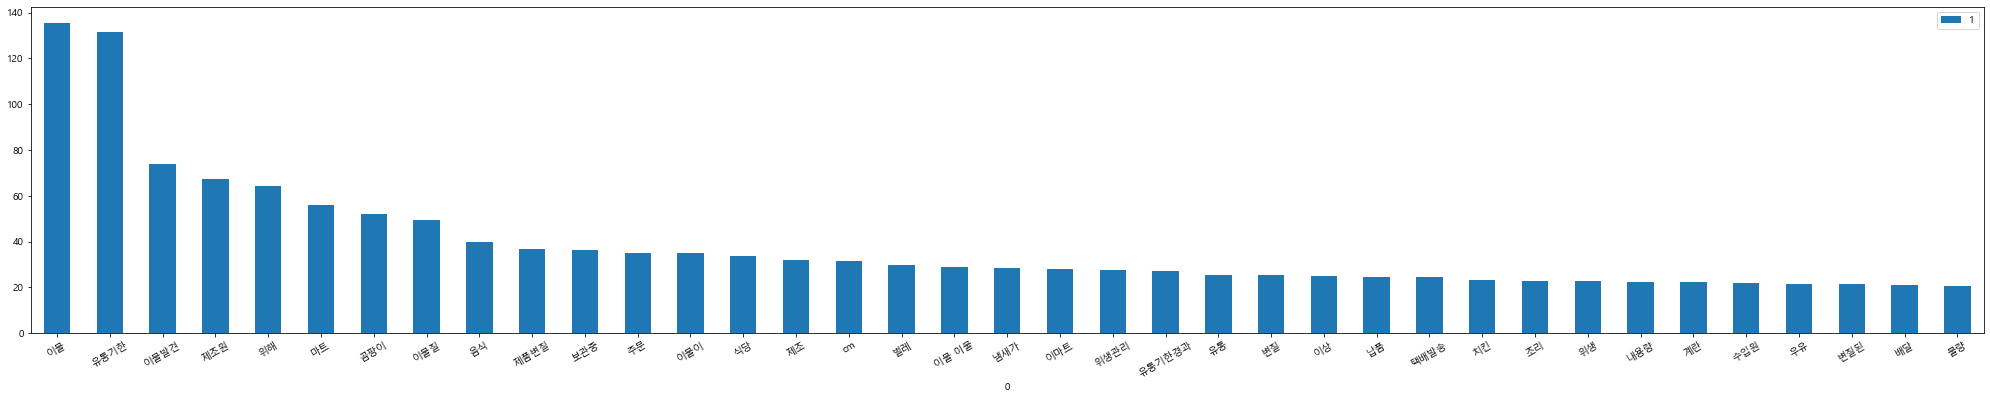

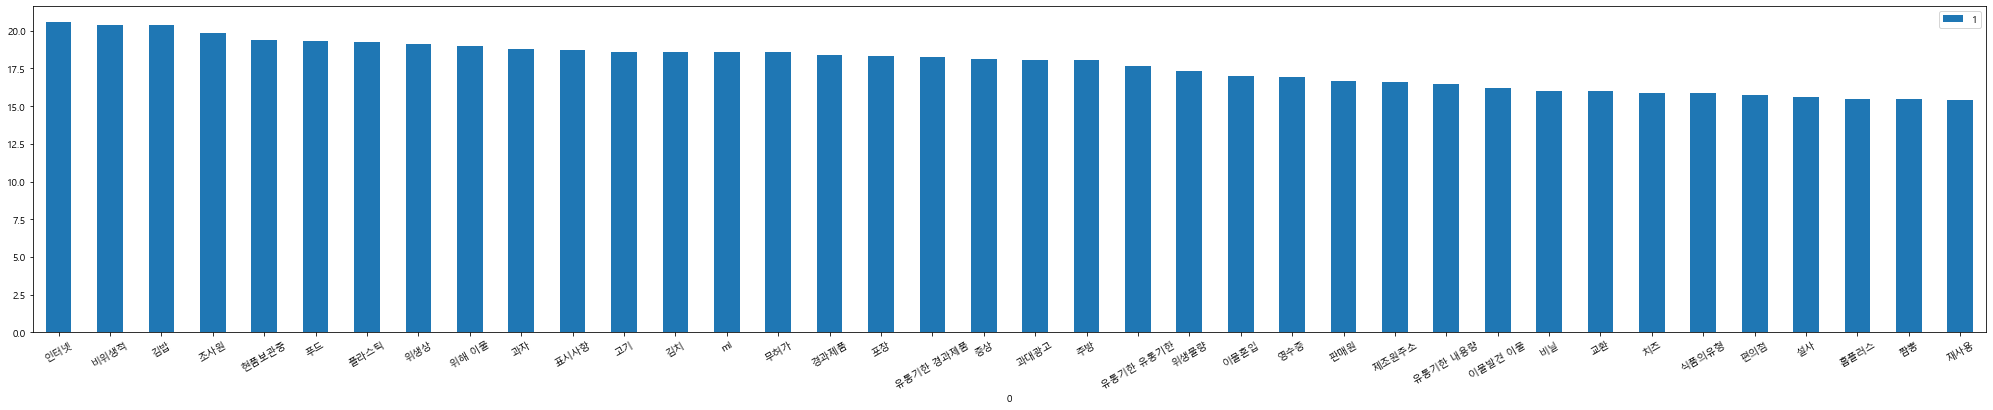

In [34]:
result_df.set_index(0)[0:37].plot(kind='bar', rot='30', figsize=(35,6))
result_df.set_index(0)[37:75].plot(kind='bar', rot='30', figsize=(35,6))

### <font color='green'> 4.2.2 년도별 키워드 빈도수 분석
- 연도별로 나누어서 주요 키워드 출력
- 시작년도, 끝년도 지정
- 신고일자가 없는 1401개는 데이터에서 삭제

In [29]:
df = df.reset_index()
df.dropna(axis=0, inplace=True) # 결측값이 있는 행을 삭제

In [62]:
start_year = 2015
end_year = 2019

In [59]:
# 시작년도, 끝년도 지정

start_year = 2015
end_year = 2019

corpus = [""] * len(df)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (df['신고일시'] >= start_date) & (df['신고일시'] <= end_date)
    temp_df = df[dt_index]

    for i, fn in enumerate(temp_df['신고내용']) :
        corpus[i] = " ".join(twitter.nouns(fn))
        
    vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.005,max_df=0.5)
    X = vect.fit_transform(corpus)
    X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name, count))
    result = pd.DataFrame(result)
    result.columns=[str(year) + ' 키워드','빈도수']
    result_df = pd.concat([result_df,result],axis=1)

    

In [31]:
# 저장 파일 이름 설정
fn = '../1399_working/주제어빈도_년도별_'
result_df.to_excel(fn + '.xlsx')

result_df.head(20)

,2015 키워드,빈도수,2016 키워드,빈도수,2017 키워드,빈도수,2018 키워드,빈도수,2019 키워드,빈도수
0,이물,30.021765,이물,55.540280,신고접수,54.387336,신고접수,45.447017,이물,47.879391
1,신고접수,27.672943,신고접수,54.739595,이물,45.136821,이물,43.055475,유통기한,45.770487
2,유통기한,20.179669,이물발견,33.718356,재발방지,35.208214,재발방지,38.520422,재발방지,44.577248
3,신고인,16.114759,유통기한,31.155674,재발방지 신고접수,28.742336,유통기한,38.193253,신고접수,42.033015
4,이물발견,14.147491,재발방지,24.846665,유통기한,26.584302,제조원,29.473172,제조원,35.263381
5,이물질,12.748645,신고접수 이물,24.129279,원인조사,23.122027,위해,27.014934,재발방지 신고접수,31.359838
6,위해,10.331989,위해,22.443547,이물발견,21.943626,이물발견,23.371769,이물발견,23.643941
7,신고자,8.482753,원인조사,22.096145,위해,21.767443,재발방지 신고접수,22.647609,조사기관,18.482525
8,원인조사,8.410502,제조원,17.734283,신고접수 이물,19.402330,위해 신고접수,19.666711,곰팡이,17.859000
9,이물발견 신고접수,7.936951,마트,17.082078,제조원,19.387565,이물질,19.276992,원인조사,14.484947


# <font color='green'> 5. LDA 분석 : 토픽 모델링 분석¶

In [35]:
# 인자 설정
# Random Seed 값 설정, 이값에 따라 결과 달라짐

random_seed = 1004
n_words = 20 # 상위 20개

corpus = []

# 파일 내용 읽어서 코퍼스에 저장

for fn in tqdm_notebook(df['신고내용']) :
    text = " ".join(twitter.nouns(fn))
    corpus.append(' '.join([w for w in text.split() if len(w) > 1])) # 한 글자는 제외하고 명사추출

vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 2),min_df=0.05,max_df=0.5)
X = vect.fit_transform(corpus)
X = TfidfTransformer().fit_transform(X)

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [39]:
X
X.toarray()

<2644x21 sparse matrix of type '<class 'numpy.float64'>'
	with 6413 stored elements in Compressed Sparse Row format>

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47503615, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67706944, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51944702, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [41]:
%pwd
dir_path

'C:\\Users\\NFSI291\\1A1A\\naver news\\script_news'

'D:/2020기본과제/1399/1399_data/'

In [45]:
X

<2644x21 sparse matrix of type '<class 'numpy.float64'>'
	with 6413 stored elements in Compressed Sparse Row format>

In [44]:

sparse_matrix = scipy.sparse.csc_matrix(np.array([[0, 0, 3], [4, 0, 0]]))
sparse_matrix

<2x3 sparse matrix of type '<class 'numpy.intc'>'
	with 2 stored elements in Compressed Sparse Column format>

In [50]:
import scipy.sparse
scipy.sparse.save_npz(dir_path + 'sparse_matrix.npz', X)
X = scipy.sparse.load_npz(dir_path + 'sparse_matrix.npz')
X

<2644x21 sparse matrix of type '<class 'numpy.float64'>'
	with 6413 stored elements in Compressed Sparse Row format>

In [53]:
%pwd
dir_path

'C:\\Users\\NFSI291\\1A1A\\naver news\\script_news'

'D:/2020기본과제/1399/1399_data/'

In [57]:
# 토픽 갯수, 리스트 타입으로 한번에 설정 [5,6,7] 등 한번에 실행도 가능

n_topics = [3,5,7,9]
n_topics = [7]

for i in tqdm_notebook(n_topics):
        
    # LDA 수횅
    lda = LatentDirichletAllocation(n_components = i,learning_method="batch",random_state=random_seed)
    document_topics = lda.fit_transform(X)

    sorting = np.argsort(lda.components_, axis=1)[:,::-1]
    feature_names = np.array(vect.get_feature_names())

    # 각 문서별 주제번호 할당
    topic_list = np.argmax(document_topics,axis=1).tolist()

    topic_words = pd.DataFrame(feature_names[sorting])
    topic_words = topic_words.T
    topic_words = topic_words[:n_words]

    # 파일경로 지정
    fpath =  dir_path + "../1399_output/"  + "lda_result_n_" + str(i) + "_" + str(random_seed) + "_"

    # 파일 저장
    document_topics = pd.DataFrame(document_topics)
    document_topics.to_excel(fpath + "document_topic.xlsx")
    topic_words.to_excel(fpath + "topic_words.xlsx")

    # 시각화 및 저장
    pyldavis = pyLDAvis.sklearn.prepare(lda, X, vect)
    pyLDAvis.save_html(pyldavis, fpath + str(i) + "lda.html")

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [58]:
document_topics

,0,1,2,3,4,5,6
0,0.685254,0.052337,0.052324,0.052227,0.053299,0.052213,0.052347
1,0.071474,0.571021,0.071501,0.071429,0.071637,0.071429,0.071510
2,0.684220,0.052599,0.052599,0.052610,0.052599,0.052599,0.052773
3,0.059174,0.351020,0.059174,0.353112,0.059174,0.059174,0.059174
4,0.629275,0.061748,0.061748,0.061761,0.061748,0.061748,0.061972
...,...,...,...,...,...,...,...
2639,0.071474,0.571021,0.071501,0.071429,0.071637,0.071429,0.071510
2640,0.423197,0.054824,0.054330,0.054251,0.304710,0.054218,0.054470
2641,0.447427,0.052954,0.052954,0.287586,0.052954,0.052954,0.053172
2642,0.529225,0.052461,0.208376,0.052479,0.052461,0.052461,0.052537


In [59]:
topic_words

,0,1,2,3,4,5,6
0,이물,제조원,마트,보관중,유통기한,음식,이물질
1,이물발견,냄새가,곰팡이,이상,제조원,주문,택배발송
2,위해,내용량,제품변질,이물이,위해,제조,이물
3,이물이,유통기한,유통,위해,마트,위해,이물발견
4,이물 이물,위해,유통기한,이물,보관중,이물발견,제조원
5,cm,보관중,위해,이물발견,제조,이물이,cm
6,제조원,제품변질,제조원,유통기한,이상,유통,유통기한
7,유통기한,이물,보관중,제조원,이물이,유통기한,위해
8,곰팡이,이물이,이물,유통,유통,냄새가,이물이
9,보관중,마트,이물발견,마트,이물,이물,마트


# <font color='green'> A. LDA 연도별 추세 : 토픽 모델링 분포 분석
- 앞에서 topic_list 에는 각 문서의 주제 번호가 할당되어있음

In [63]:
# LDA 년도별 문서 분포 결과 출력

topic_list = pd.Series(topic_list)
result_df = pd.DataFrame()

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (df['신고일시'] >= start_date) & (df['신고일시'] <= end_date)
    sub_df = df[dt_idx]
    
    dt_idx.index = topic_list.index # index 번호를 맞추기
    sub_topic_list = topic_list[dt_idx]
    
    result = []
    for t in range(max(topic_list) + 1):
        num = len(sub_topic_list[sub_topic_list==t])
        result.append(num)
    
    result = pd.Series(result,name=str(year))
    result_df = pd.concat([result_df,result],axis=1)            


# 비율로 만들기
result_df = result_df.T.apply(lambda x: x / x.sum(),axis=1)

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [64]:
result_df

,0,1,2,3,4,5,6
2015,0.380952,0.042857,0.128571,0.078571,0.109524,0.142857,0.116667
2016,0.440613,0.059387,0.195402,0.051724,0.113027,0.090038,0.049808
2017,0.397363,0.079096,0.180791,0.033898,0.099812,0.133710,0.075330
2018,0.333333,0.098837,0.129845,0.050388,0.141473,0.112403,0.133721
2019,0.334465,0.083192,0.157895,0.028862,0.174873,0.101868,0.118846


## LDA 토픽 비율 그래프 그리기
- https://dailyheumsi.tistory.com/98 참조

Text(0.19047619047619047, 0.0, '38.1')

Text(0.22030651340996169, 1.0, '44.1')

Text(0.19868173258003766, 2.0, '39.7')

Text(0.16666666666666666, 3.0, '33.3')

Text(0.16723259762308998, 4.0, '33.4')

Text(0.4023809523809524, 0.0, '4.3')

Text(0.47030651340996166, 1.0, '5.9')

Text(0.4369114877589454, 2.0, '7.9')

Text(0.38275193798449614, 3.0, '9.9')

Text(0.3760611205432937, 4.0, '8.3')

Text(0.48809523809523814, 0.0, '12.9')

Text(0.5977011494252874, 1.0, '19.5')

Text(0.5668549905838041, 2.0, '18.1')

Text(0.497093023255814, 3.0, '13.0')

Text(0.49660441426146007, 4.0, '15.8')

Text(0.5916666666666667, 0.0, '7.9')

Text(0.7212643678160919, 1.0, '5.2')

Text(0.6741996233521657, 2.0, '3.4')

Text(0.5872093023255813, 3.0, '5.0')

Text(0.5899830220713074, 4.0, '2.9')

Text(0.6857142857142857, 0.0, '11.0')

Text(0.803639846743295, 1.0, '11.3')

Text(0.7410546139359699, 2.0, '10.0')

Text(0.6831395348837209, 3.0, '14.1')

Text(0.6918505942275043, 4.0, '17.5')

Text(0.8119047619047619, 0.0, '14.3')

Text(0.9051724137931034, 1.0, '9.0')

Text(0.8578154425612053, 2.0, '13.4')

Text(0.810077519379845, 3.0, '11.2')

Text(0.830220713073005, 4.0, '10.2')

Text(0.9416666666666667, 0.0, '11.7')

Text(0.9750957854406129, 1.0, '5.0')

Text(0.9623352165725048, 2.0, '7.5')

Text(0.9331395348837209, 3.0, '13.4')

Text(0.9405772495755518, 4.0, '11.9')

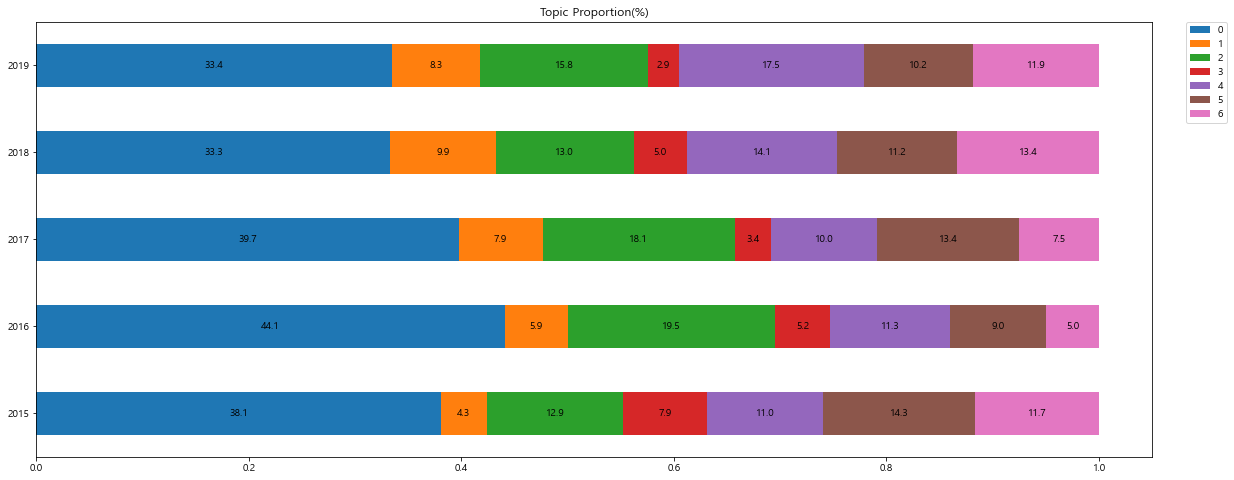

In [65]:
ax = result_df.plot.barh(stacked=True,legend=False,figsize=(20, 8), title="Topic Proportion(%)")
ax.legend(bbox_to_anchor=(1.03, 1),loc=2, borderaxespad=0.)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

# 최적의 토픽수를 찾기
## LDA in Python – How to grid search best topic models?
https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [39]:
lda # Model attributes

LatentDirichletAllocation(n_components=7, random_state=1004)

### a. Diagnose model performance with perplexity and log-likelihood

In [66]:
from konlpy.utils import pprint
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(X))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(X))

# See model parameters
pprint(lda.get_params())

Log Likelihood:  -4387.11725389153
Perplexity:  41.15843513727793
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 1004,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


On a different note, perplexity might not be the best measure to evaluate topic models because it doesn’t consider the context and semantic associations between words. This can be captured using topic coherence measure, an example of this is described in the gensim tutorial I mentioned earlier.

### b. How to GridSearch the best LDA model, see the best topic model and its parameters?
The most important tuning parameter for LDA models is n_components (number of topics). In addition, I am going to search learning_decay (which controls the learning rate) as well. Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources. 
Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.

In [68]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [3,5,7,9,11], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
%time model.fit(X)

Wall time: 34.1 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [69]:
model.cv_results_["mean_test_score"]
print(model.best_score_)
print(model.best_params_)

array([ -919.46030971, -1004.0264732 , -1062.49617581, -1121.97087063,
       -1156.33076462,  -918.01845457, -1000.52747626, -1074.64243365,
       -1126.30938837, -1159.11433316,  -915.77055798, -1000.71509349,
       -1066.8466333 , -1116.83190546, -1163.42292401])

-915.7705579794825
{'learning_decay': 0.9, 'n_components': 3}


In [70]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 3}
Best Log Likelihood Score:  -915.7705579794825
Model Perplexity:  33.641357430316475


### Compare LDA Model Performance Scores
Plotting the log-likelihood scores against num_topics, clearly shows number of topics = 3 has better scores. And learning_decay of 0.9 outperforms both 0.5 and 0.7......This makes me think, even though we know that the dataset has 20 distinct topics to start with, some topics could share common keywords. For example, ‘alt.atheism’ and ‘soc.religion.christian’ can have a lot of common words. Same with ‘rec.motorcycles’ and ‘rec.autos’, ‘comp.sys.ibm.pc.hardware’ and ‘comp.sys.mac.hardware’, you get the idea.

To tune this even further, you can do a finer grid search for number of topics between 10 and 15. But I am going to skip that for now.
So the bottom line is, a lower optimal number of distinct topics (even 10 topics) may be reasonable for this dataset. I don’t know that yet. But LDA says so. Let’s see.


In [71]:
pd.DataFrame(model.cv_results_)[['param_learning_decay', 'param_n_components', 'mean_test_score']].sort_values(by ='mean_test_score', ascending=False)

,param_learning_decay,param_n_components,mean_test_score
10,0.9,3,-915.770558
5,0.7,3,-918.018455
0,0.5,3,-919.460310
6,0.7,5,-1000.527476
11,0.9,5,-1000.715093
1,0.5,5,-1004.026473
2,0.5,7,-1062.496176
12,0.9,7,-1066.846633
7,0.7,7,-1074.642434
13,0.9,9,-1116.831905
